<a href="https://colab.research.google.com/github/luciaemiliaeu/Nootebooks-Alura/blob/main/PLN_an%C3%A1lise_de_sentimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto desenvolvido nas aulas
- Linguagem Natural parte 1: Introdução a NLP com análise de sentimento
- Linguagem Natural parte 2: continuando a análise de sentimento
da [Aula Cursos Online de Tecnologia](https://cursos.alura.com.br/formacao-machine-learning)

*nota*: esse notebook não é uma reprodução do notebook usado pelo instrutor do curso, mas sim o meu processo de aprendizagem. 

In [1]:
!pip install unidecode
!pip install wordcloud

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

#Base de dados

O dataset [imdb]( https://www.kaggle.com/luisfredgs/imdb-ptbr) é um dos mais famosos benchmarks para modelos de classificação de textos que existe. Ele é composto por reviwes de filmes e uma tag de identificação sobre o sentimendo da review (pos/neg).

Como a base de dados é muito grande pra subir no github, eu coloquei no meu Drive e aqui eu faço acesso direto a ela.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alura - ML/imdb-reviews-pt-br.csv')

In [5]:
dataset.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [6]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         49459 non-null  int64 
 1   text_en    49459 non-null  object
 2   text_pt    49459 non-null  object
 3   sentiment  49459 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


#Pré-processamento

## Criando uma classe com base na coluna 'sentiment'

In [7]:
dataset['sentiment'].value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [8]:
dataset = dataset.assign(Class = dataset['sentiment'].replace(['neg', 'pos'], [0,1]))
dataset['Class'].value_counts()

0    24765
1    24694
Name: Class, dtype: int64

## Limpeza dos dados

Usando a biblioteca [ntkl](https://www.nltk.org/).

In [9]:
import nltk

nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

Transformações:
- Filtrar stop wrods  e pontuação 
- Transformar em minúsculo
- Excluir acentuação
- Reduzir as palavras aos radicais

In [10]:
from nltk import tokenize 
from string import punctuation
import unidecode

In [11]:
# considerando stopwords as palavras sugeridas pelo nltk e pontuações 
stop_words = nltk.corpus.stopwords.words("portuguese") + list(punctuation)

In [12]:
# o unidecode serve para retirar acentuação das palavras
# lower transforma tudo em minúsculo
# stem exclui prefixos e sufixos das palavras, assim 'filme' e 'filmes' vão ter o mesmo significado

def filter_words(sentence):
  return ' '.join([ stemmer.stem(unidecode.unidecode(word).lower()) for 
                   word in tokenizer.tokenize(sentence) 
                   if word not in stop_words])

tokenizer = tokenize.WordPunctTokenizer()
stemmer = nltk.RSLPStemmer()
dataset = dataset.assign(valid_words = dataset['text_pt'].apply(lambda x: filter_words(x)))

In [13]:
dataset

,id,text_en,text_pt,sentiment,Class,valid_words
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,mais vez sr costn arrum film temp necessari al...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,est exempl motiv maior film aca mesm gener cha...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,nem beatl pud escrev music tod gost emb walt h...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,film fot lata palavr apropri verdad tant ous s...
...,...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1,com med vot baix fat funcionari loc ach tud be...
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1,o enred algum reviravolt infeliz inacredita no...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1,est espant form film maior outr med 5 estrel m...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1,a christm togeth real vei ant temp cri john de...


## Criando *tokens*

In [14]:
words = ' '.join([text for text in dataset['valid_words']])

In [15]:
tokens = tokenizer.tokenize(words)

Analisando a frequêcia de cada token no corpus

In [16]:
frequency = nltk.FreqDist(tokens)
df_frequency = pd.DataFrame({"word": list(frequency.keys()),
                             "frequency": list(frequency.values())})

In [17]:
df_frequency.sort_values(by='frequency', ascending=False).head(10)

,word,frequency
5,film,192424
208,eu,53807
29,o,47347
135,tod,45616
69,pod,43725
62,ser,37909
461,algum,37807
70,faz,37152
114,real,36548
19,a,34139


Pareto

In [18]:
import seaborn as sns

In [19]:
df_frequency = df_frequency.nlargest(n=20, columns='frequency')
df_frequency['percentage'] = df_frequency['frequency'].cumsum()/ df_frequency['frequency'].sum() * 100

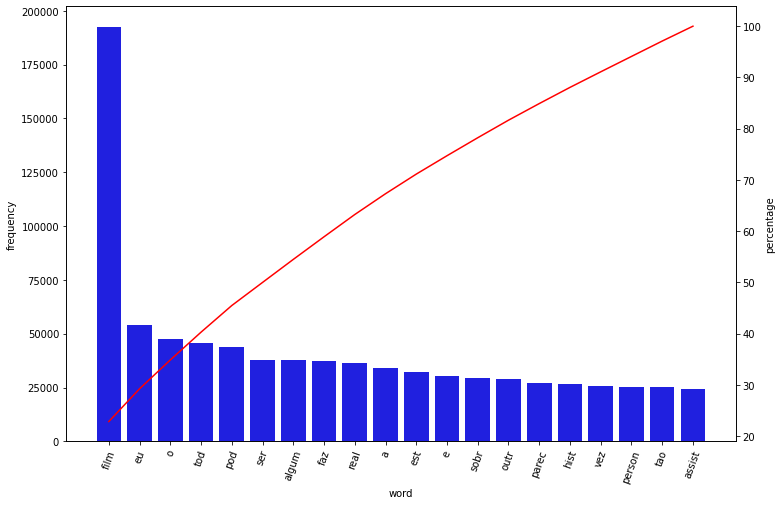

In [20]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_frequency, x = 'word', y = 'frequency', color = 'blue')
ax2 = ax.twinx()
sns.lineplot(data = df_frequency, x = 'word', y = 'percentage',
             color = 'red', sort = False, ax = ax2)
ax.set_xticklabels(df_frequency['word'].values, rotation=70)
plt.show()

## Visualizando as palavras

Usando a lib [wordcloud](https://pypi.org/project/wordcloud/).

In [21]:
from wordcloud import WordCloud

In [22]:
word_cloud = WordCloud(width = 800, height = 500, max_font_size = 110, 
                       collocations = False).generate(words)

#collocation : se True as palavras são bigramas ('um filme', por exemplo)

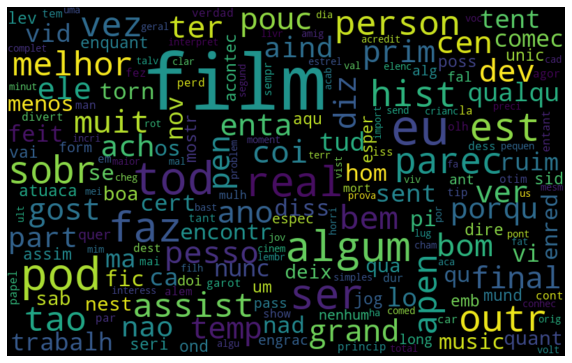

In [23]:
plt.figure(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Visualizando a word cloud por classe

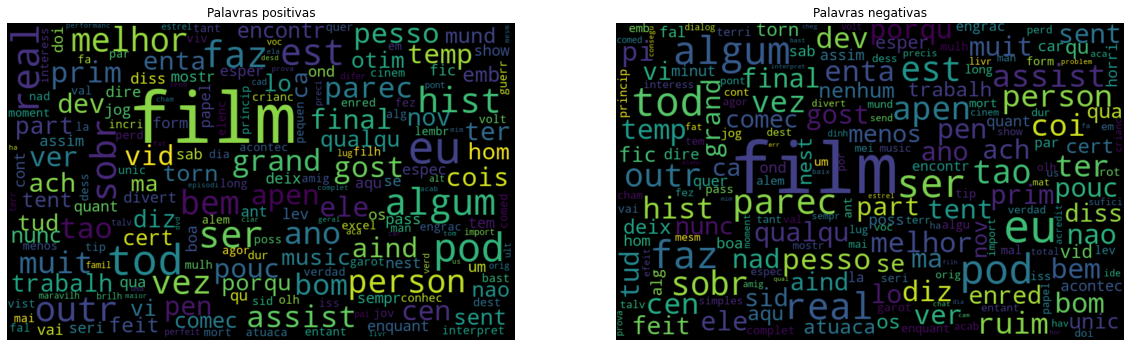

In [24]:
def get_word_cloud(df_column):
  words = ' '.join([text for text in df_column])
  word_cloud = WordCloud(width = 800, height = 500, max_font_size = 110, 
                       collocations = False).generate(words)
  return word_cloud

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10), sharey=True)

positive_texts = dataset.loc[dataset[dataset['sentiment']=='pos'].index,'valid_words']
ax1.imshow(get_word_cloud(positive_texts), interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Palavras positivas')

negative_texts = dataset.loc[dataset[dataset['sentiment']=='neg'].index,'valid_words']
ax2.imshow(get_word_cloud(negative_texts), interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Palavras negativas')

plt.show()

## Criando a bag of words

Aqui os dados são transformados para vetores numéricos, assim os algoritmos de ML podem aprender sobre eles.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
vectorize = CountVectorizer(lowercase=False)
bag_of_words = vectorize.fit_transform(dataset['valid_words'])

O vectorize.fit_transform retorna um matriz sparsa com todas as palavras do corpus textual.

In [27]:
bag_of_words

<49459x69048 sparse matrix of type '<class 'numpy.int64'>'
	with 4980863 stored elements in Compressed Sparse Row format>

In [28]:
bag_of_words.shape

(49459, 69048)

Para limitar a quantidade de palavras e diminuir o tamanho da matriz ( e o espaço de armazenamento, consequentemente), utilizamos o parâmetro *max_features*. Assim, a bag of words vai ser comporta das *n* palavras mais utilizadas no corpus. 

In [29]:
vectorize = CountVectorizer(lowercase=False, max_features=50)
bag_of_words_50 = vectorize.fit_transform(dataset['valid_words'])
bag_of_words_50.shape

(49459, 50)

## Atribuindo peso às palavras

Com o TFIDF as palavras recebem um peso proporcional à su frequência no texto e equilibrada pela frequência no corpus. Ou seja, se as palavras são frequentemente utilizadas e não colaboram com a distinção dos sentimentos, o peso é menor. Já palavras menos repetidas e que ajudam a atribuir sentimento, recebem peso maior. 

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
tfidf_50 = TfidfVectorizer(lowercase=False, max_features=50)

In [32]:
weighted_bag_of_words_50 = tfidf_50.fit_transform(dataset['valid_words'])

In [33]:
pd.DataFrame(weighted_bag_of_words_50.todense(),
             columns = tfidf_50.get_feature_names())

,ach,aind,algum,ano,apen,assist,bem,bom,cen,cois,dev,diz,ele,enta,est,eu,faz,film,final,gost,grand,hist,lo,melhor,muit,nao,nov,outr,parec,part,person,pesso,pod,porqu,pouc,prim,qualqu,real,sent,ser,sobr,tao,temp,tent,ter,tod,tud,ver,vez,vid
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187598,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.158245,0.000000,0.159546,0.100257,0.207946,0.000000,0.000000,0.000000,0.000000,0.370641,0.000000,0.000000,0.000000,0.174561,0.183219,0.000000,0.578616,0.201523,0.149300,0.0,0.206072,0.0000,0.214587,0.000000,0.000000,0.157342,0.173915,0.000000,0.197932,0.00000,0.000000,0.000000,0.214492,0.000000,0.182219,0.000000
1,0.000000,0.125711,0.000000,0.000000,0.000000,0.437148,0.220735,0.000000,0.000000,0.116942,0.000000,0.0,0.00000,0.000000,0.093098,0.000000,0.187727,0.412881,0.000000,0.000000,0.000000,0.000000,0.000000,0.327082,0.000000,0.125105,0.000000,0.000000,0.000000,0.000000,0.340410,0.000000,0.000000,0.0,0.121235,0.0000,0.000000,0.191457,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.085968,0.000000,0.468042,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.117775,0.132806,0.250362,0.000000,0.342057,0.169810,0.000000,0.000000,0.000000,0.000000,0.354017,0.000000,0.145305,0.000000,0.179940,0.321093,0.167748,0.248554,0.0,0.000000,0.1693,0.000000,0.135444,0.184510,0.000000,0.000000,0.153013,0.000000,0.00000,0.000000,0.364902,0.357085,0.000000,0.151679,0.000000
3,0.000000,0.133355,0.000000,0.125788,0.115018,0.115932,0.117078,0.000000,0.130034,0.248105,0.123072,0.0,0.00000,0.128340,0.197518,0.176603,0.000000,0.375417,0.000000,0.512913,0.000000,0.000000,0.134709,0.000000,0.249164,0.000000,0.000000,0.217884,0.000000,0.000000,0.120370,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.123527,0.00000,0.122067,0.364779,0.000000,0.124125,0.000000,0.144543
4,0.000000,0.000000,0.224200,0.000000,0.258692,0.260747,0.263325,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.288655,0.000000,0.000000,0.000000,0.281454,0.000000,0.000000,0.000000,0.262609,0.000000,0.260128,0.000000,0.000000,0.000000,0.000000,0.000000,0.303430,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.456796,0.311136,0.220854,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,0.359784,0.000000,0.136035,0.000000,0.000000,0.158211,0.159775,0.000000,0.177454,0.000000,0.000000,0.0,0.00000,0.000000,0.134775,0.000000,0.000000,0.341550,0.000000,0.349982,0.173744,0.000000,0.000000,0.000000,0.510045,0.362220,0.000000,0.000000,0.000000,0.000000,0.164266,0.000000,0.000000,0.0,0.175508,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.182679,0.000000,0.000000,0.000000
49455,0.000000,0.000000,0.584594,0.000000,0.337265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.368788,0.273218,0.0,0.000000,0.0000,0.392695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.423840
49456,0.000000,0.000000,0.245060,0.103079,0.000000,0.095002,0.191883,0.101183,0.106558,0.203313,0.100853,0.0,0.21645,0.105171,0.161859,0.072360,0.000000,0.666556,0.000000,0.000000,0.000000,0.095681,0.000000,0.094777,0.000000,0.000000,0.117007,0.089274,0.000000,0.000000,0.000000,0.103063,0.076355,0.0,0.105389,0.0000,0.219489,0.000000,0.113362,0.080468,0.000000,0.094010,0.101226,0.11277,0.000000,0.298924,0.109695,0.000000,0.093191,0.000000
49457,0.172534,0.000000,0.391413,0.65855

In [34]:
tfidf = TfidfVectorizer(lowercase=False, max_features=50)
weighted_bag_of_words = tfidf.fit_transform(dataset['valid_words'])

## NGrams: analisando conjuntos de palavras

Os ngrams agrupam palavras dando uma 'memória' sobre o texto. 

Por exemplo: 

In [35]:
from nltk import ngrams

In [36]:
frase = "Assisti um ótimo filme."
frase_separada = tokenizer.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme'), ('filme', '.')]

Aplicando na bag of words

In [37]:
tfidf_bigram = TfidfVectorizer(lowercase=False, ngram_range=(1,2))

In [38]:
weighted_bag_of_words_bigrams = tfidf_bigram.fit_transform(dataset['valid_words'])

In [39]:
tfidf_bigram_50 = TfidfVectorizer(lowercase=False, ngram_range=(1,2), max_features=50)
weighted_bag_of_words_bigrams_50 = tfidf_bigram_50.fit_transform(dataset['valid_words'])

# Treinando o modelo

Instanciando um modelo de regressão logística.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
def classifier(data):
  x_train, x_test, y_train, y_test = train_test_split(data,
                                                    dataset['Class'], 
                                                    random_state = 42)
  model = LogisticRegression(solver="lbfgs")
  model.fit(x_train, y_train)
  return model.score(x_test, y_test)

Até aqui nós temos seis possíveis dados para processamento: 
- *bag_of_words*
- *weighted_bag_of_words*
- *weighted_bag_of_words_bigrams*

com 50 features ou sem limitação.

Vamos comparar os resultados da classificação usando cada uma delas.

In [43]:
results = {'test0': ['total', 'vectorize', classifier(bag_of_words)],
           'test1': ['50', 'vectorize', classifier(bag_of_words_50)],
           'test2': ['total', 'weighted', classifier(weighted_bag_of_words)],
           'test3': ['50', 'weighted', classifier(weighted_bag_of_words_50)],
           'test4': ['total', 'bigram', classifier(weighted_bag_of_words_bigrams)],
           'test5': ['50', 'bigram', classifier(weighted_bag_of_words_bigrams_50)]}
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['feature size', 'type', 'accuracy'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [44]:
df_results.sort_values(by='feature size').set_index(['feature size','type'])

accuracy
feature size type               
50           vectorize  0.670683
             weighted   0.674080
             bigram     0.674080
total        vectorize  0.870360
             weighted   0.674080
             bigram     0.886373


Em geral, utilizar todas as palavras melhora a aprendizagem do modelo.

Quando utilizando apenas 50 por entrada, a acurácia permaneceu similar. 

A diferença mesmo foi quando utilizamos o total das palavras e o agrupamendo 2 a 2. Para esse caso a acurácia foi de aproximadamente 0.89.